# Wavefunction Visualization in Quantum Mechanics

This project simulates and visualizes wavefunctions $\psi(x)$ in position space and $\psi(p)$ in momentum space for a Gaussian wave packet. The code uses Fourier transforms to switch between the two spaces and demonstrates key concepts in continuous-variable quantum mechanics.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Constants
hbar = 1.0  # reduced Plancks constant
m = 1.0  # mass
omega = 1.0  # angular frequency

# Constants

### Reduced Planck's constant ($\hbar$):
```python
hbar = 1.0
```
$\hbar = \frac{h}{2\pi}$, where $h$ is Planck's constant.
It is set to 1.0 for simplicity, which is common in computational physics to work in natural units. The actual value of $\hbar$ is $1.054 \times 10^{-34} \ \mathrm{J \cdot s}$.

### Mass ($m$):
```python
m = 1.0
```
Represents the mass of the particle being simulated.
Set to 1.0 to simplify calculations and focus on the qualitative behavior of the wavefunction.

### Angular frequency ($\omega$):
```python
omega = 1.0
```
Represents the angular frequency of the system (for a harmonic oscillator).
Determines how quickly the particle oscillates.

# Grid Settings

### Position space grid range ($x_{\text{min}}, x_{\text{max}}$):

In [7]:
x_min, x_max = -10, 10

Defines the range of the position grid, i.e., the simulation domain.
The particle is assumed to exist within $x \in [-10, 10]$.

### Number of grid points ($N$):

In [8]:
N = 1024

Specifies the number of discrete points used to sample the position space.
A higher $N$ provides better resolution for the wavefunction, but increases computational cost.

### Creating the position grid ($x$)

In [9]:
x = np.linspace(x_min, x_max, N)

Generates $N$ evenly spaced points between $x_{\text{min}}$ and $x_{\text{max}}$, forming the position space grid.

In [10]:
dx = x[1] - x[0]

Calculates the spacing between consecutive grid points. Necessary for performing numerical operations like integration differentiation and Fourier transforms


### Defining Wavefunction in Position Space
#### Gaussian Wave Packet:

In [13]:
x0 = 0.0  
p0 = 1.0  
sigma = 1.0  

psi_x = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * p0 * x / hbar)

The Gaussian wave packet is defined with:
- $x_0$: Center of the wave packet in position space.
- $p_0$: Mean momentum.
- $\sigma$: Width of the wave packet.

###  Normalizing the Wavefunction

In [14]:
norm_x = np.sqrt(np.sum(np.abs(psi_x)**2) * dx)
psi_x /= norm_x

### Computing Wavefunction in Momentum Space

In [16]:
dp = 2 * np.pi / (N * dx)  # momentum space grid spacing
p = np.fft.fftfreq(N, d=dx) * 2 * np.pi
psi_p = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(psi_x))) * dx / (2 * np.pi / hbar)

- `np.fft.fftfreq`: Creates the momentum grid
- `np.fft.fft` and `np.fft.fftshift`: Perform the Fourier transform and shift the zero-frequency component to the center

### Normalizing the Wavefunction in Momentum Space

In [18]:
norm_p = np.sqrt(np.sum(np.abs(psi_p)**2) * dp)
psi_p /= norm_p

###  Visualization



In [19]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

### Position space

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Asgardian\AppData\Local\Temp\ipykernel_1260\1474419632.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, np.abs(psi_x)**2, label='$|\psi(x)|^2$')
C:\Users\Asgardian\AppData\Local\Temp\ipykernel_1260\1474419632.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$|\psi(x)|^2$')


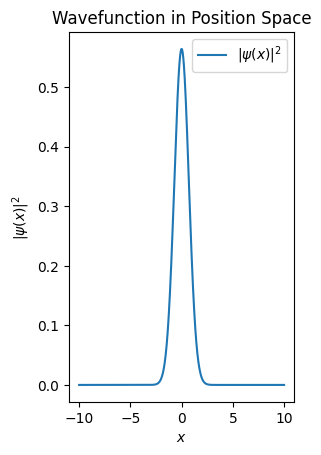

In [20]:
plt.subplot(1, 2, 1)
plt.plot(x, np.abs(psi_x)**2, label='$|\psi(x)|^2$')
plt.title('Wavefunction in Position Space')
plt.xlabel('$x$')
plt.ylabel('$|\psi(x)|^2$')
plt.legend()

### Momentum space